### Importing Libraries

In [216]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import lightgbm

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

In [217]:
df = pd.read_csv("/Users/tevfikerkut/Downloads/bank-additional-full.csv", sep = ";")

### Exploratary Data Analysis

In [218]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100
missing_values.sum()

0.0

#### Let's check our categorical variables distribution!

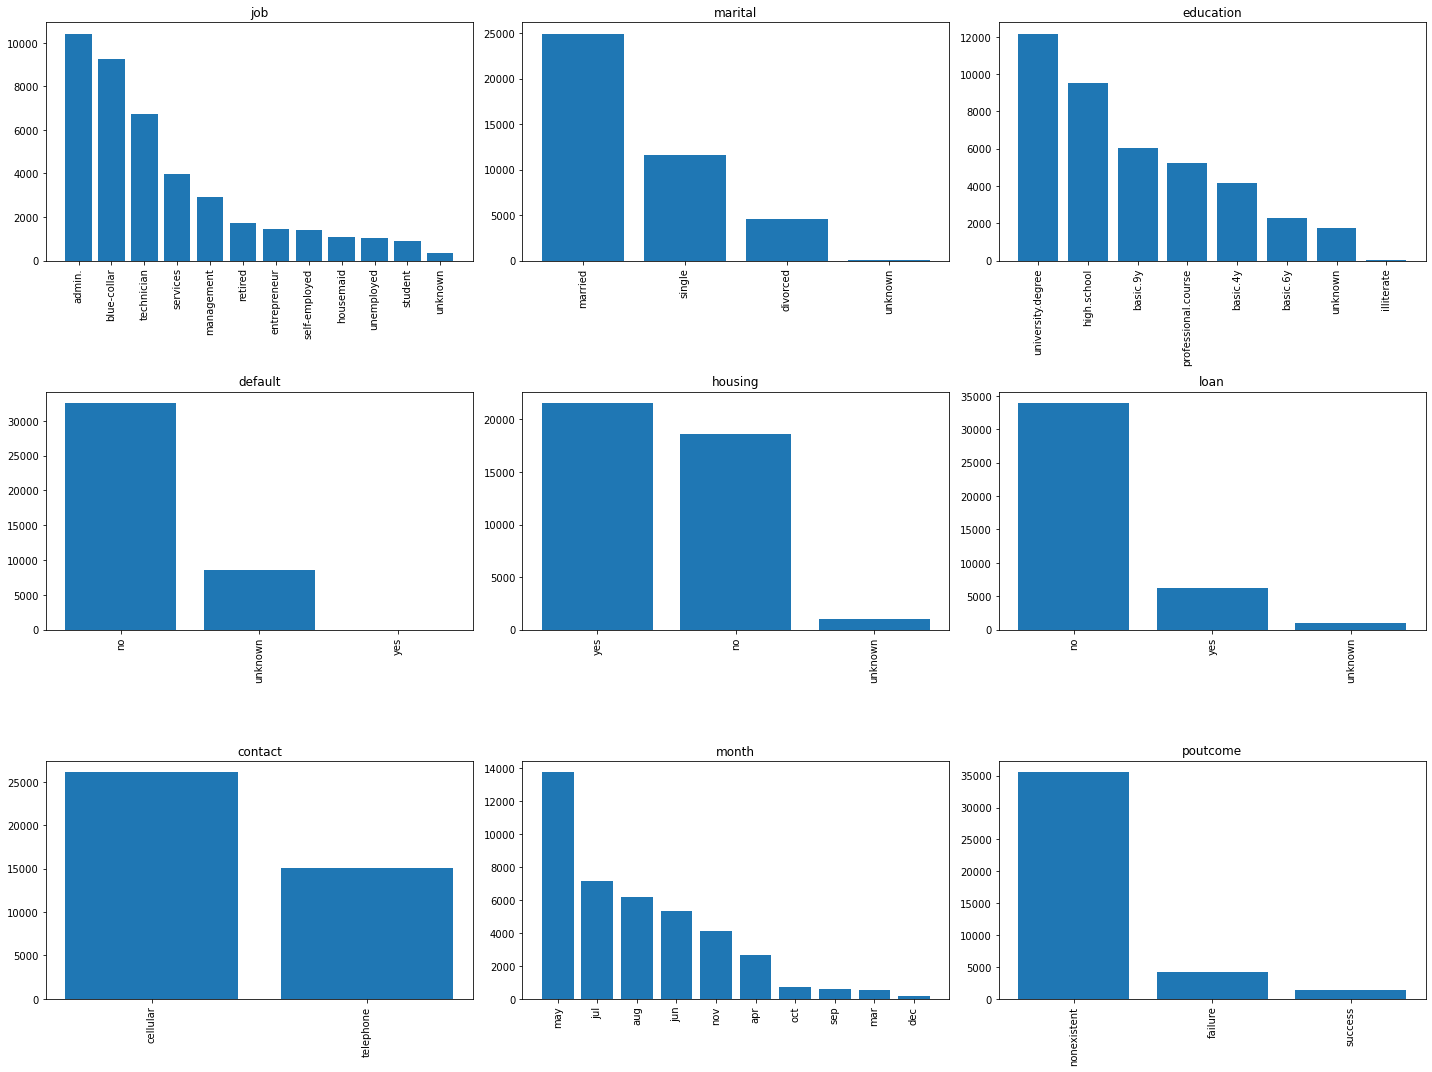

In [220]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

number = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    x_plots = number // 3
    y_plots = number % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[x_plots, y_plots].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[x_plots, y_plots].set_title(cat_column)
    
    for tick in axs[x_plots, y_plots].get_xticklabels():
        tick.set_rotation(90)
    
    number += 1
plt.tight_layout()
plt.show()

#### Comparison of Loan and Subscription (Deposit)

Text(0.05, -0.05, 'Observation: People who has loan, have not subscribed')

findfont: Font family ['San'] not found. Falling back to DejaVu Sans.


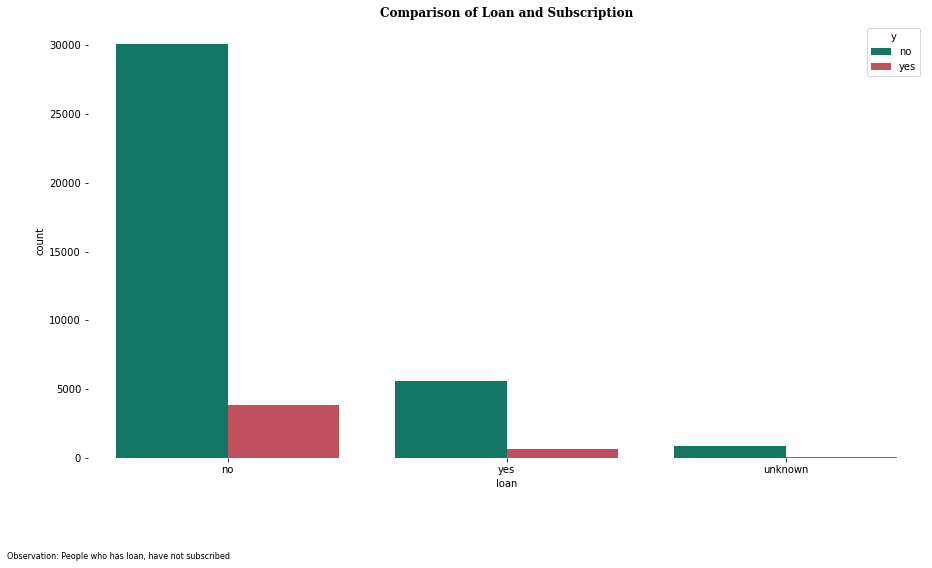

In [221]:
fig = plt.figure(figsize=(15,8))
ax=sns.countplot(data=df, x='loan', hue='y', palette=['#00876c','#d43d51'])
ax.set_title('Comparison of Loan and Subscription', font='Serif', weight='bold', size=12)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.figtext(0.05,-0.05,"Observation: People who has loan, have not subscribed",
           family='San', size=8, ha='left')

Let's check loan and age distribution

In [89]:
df.groupby(['loan']).describe()['age']

,count,mean,std,min,25%,50%,75%,max
loan,,,,,,,,
no,33950.0,40.058822,10.432882,17.0,32.0,38.0,47.0,98.0
unknown,990.0,39.951515,10.381776,17.0,32.0,38.0,47.0,86.0
yes,6248.0,39.846671,10.363886,17.0,32.0,38.0,47.0,92.0


Age distribution

<AxesSubplot:xlabel='age', ylabel='count'>

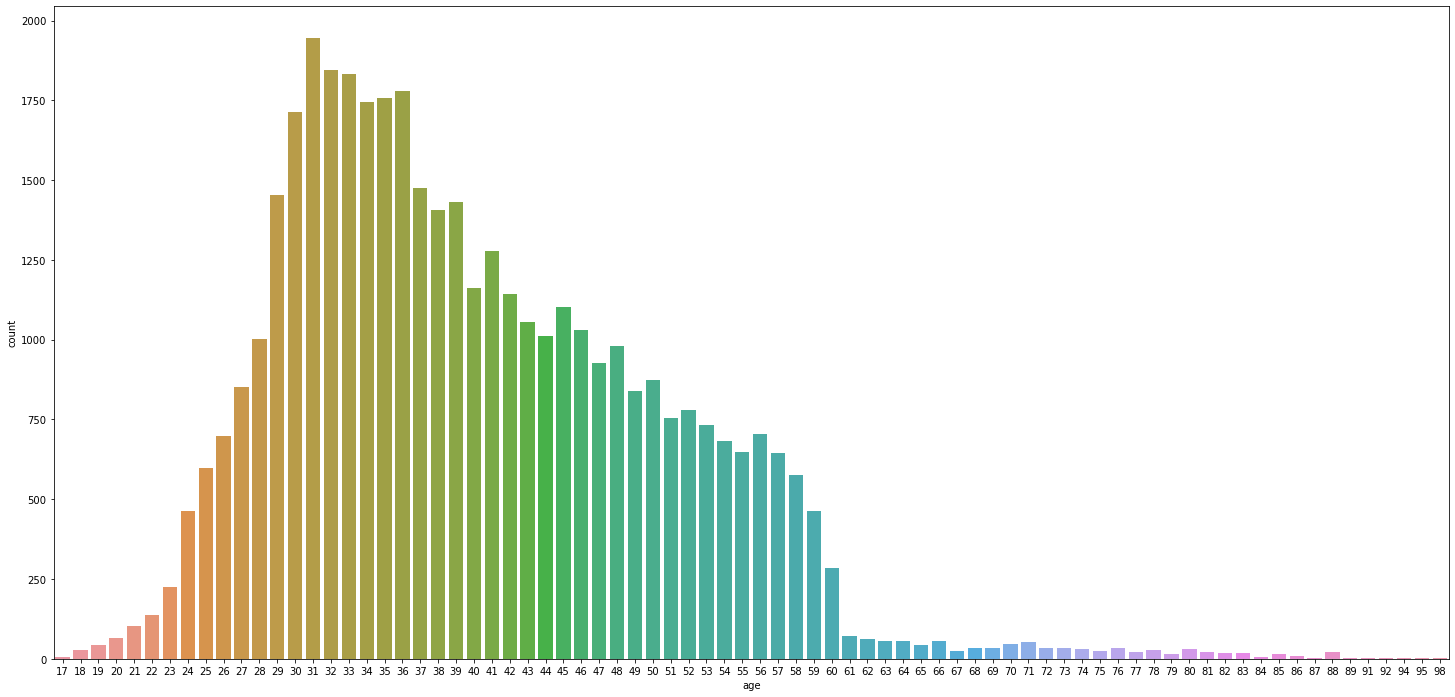

In [227]:
plt.figure(figsize = (25,12))
sns.countplot(df.age)

#### Let's check our other categorical variables

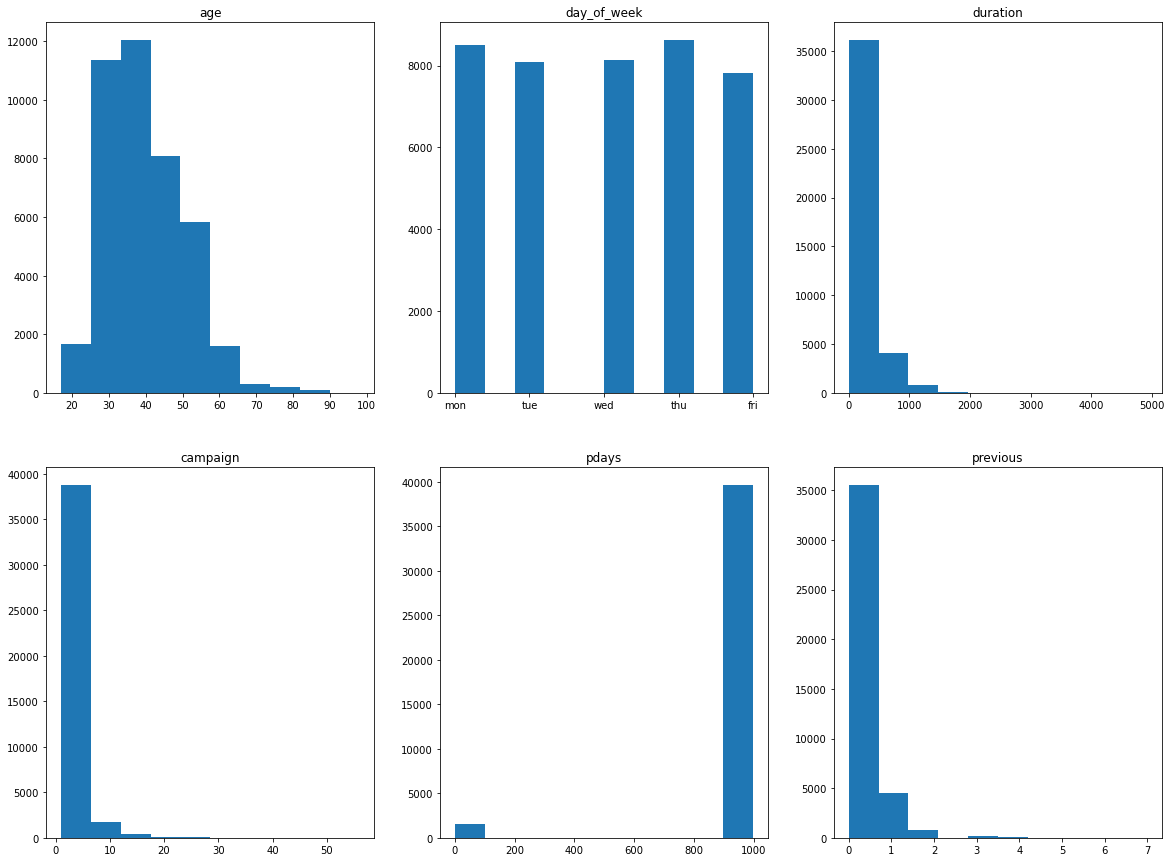

In [92]:
num_columns = ['age','day_of_week','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()


#### Target's value counts

<AxesSubplot:title={'center':'Subscription value counts'}>

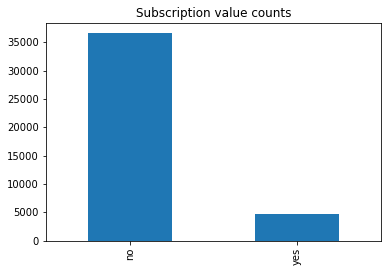

In [229]:
value_counts = df['y'].value_counts()

value_counts.plot.bar(title = 'Subscription value counts')

#### Job and Deposit Subscription Relation

<AxesSubplot:title={'center':'Job and Deposit'}>

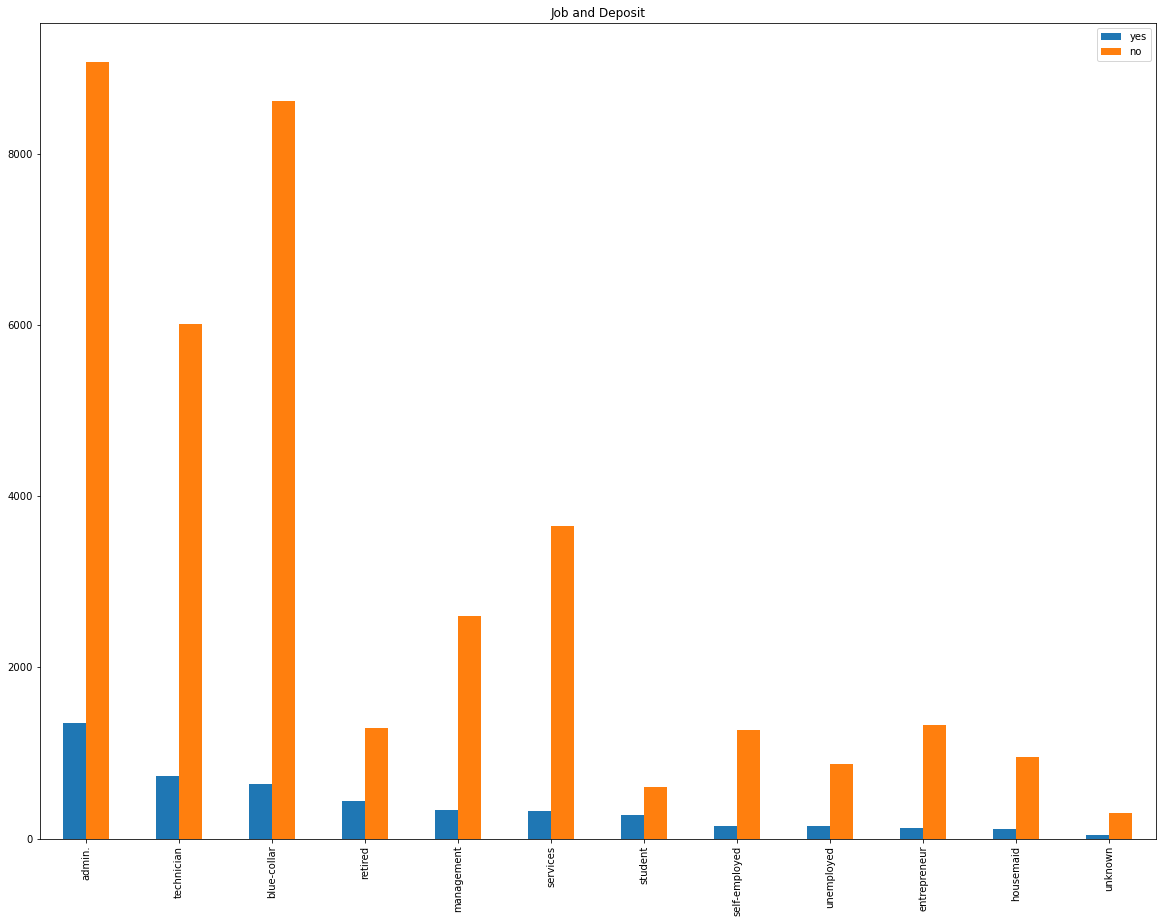

In [231]:
j_df = pd.DataFrame()
j_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and Deposit',figsize = (20,15))

#### Lets check if campaign has significant change in subscription

<AxesSubplot:xlabel='campaign', ylabel='count'>

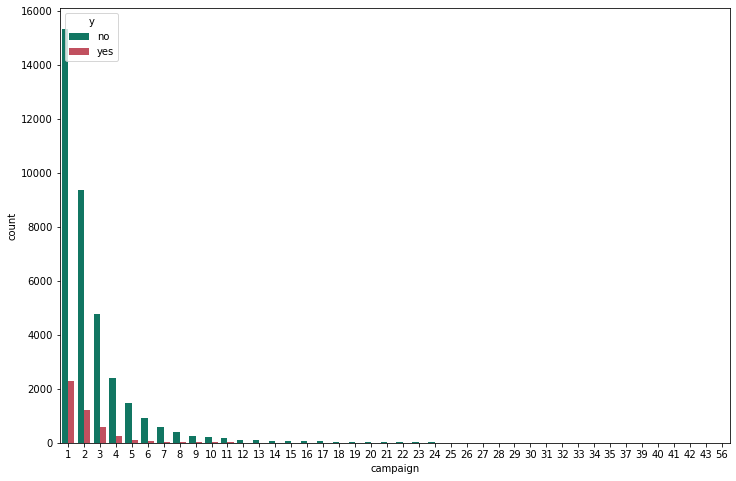

In [232]:
fig=plt.figure(figsize=(12,8))
sns.countplot(data=df,x='campaign',hue='y', palette=['#00876c','#d43d51'])

<AxesSubplot:title={'center':'Marital status and target'}>

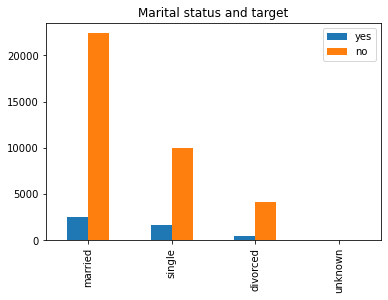

In [233]:
# Marital Status and Deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == "yes"]['marital'].value_counts()
j_df['no'] = df[df['y'] == "no"]['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and target')

### Data Preprocessing  & Engineering Features

lets replace yes with 1, no with 0 and check correlation matrix

In [234]:
df.y = df.y.replace({"yes": 1, "no": 0})
import pandas as pd
import numpy as np
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


Let's apply label_encoding to categorical variables

In [235]:
categorical_columns = df.select_dtypes("object").columns

In [236]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

pdays column ( pdays: number of days that passed by after the client was last contacted from a previous campaign ) seems irrelevant. Let's drop it.

In [237]:
df = df.drop(["pdays"],1)

### Building Model ( Baseline Models and Their Scores)

In [238]:
X = df.drop(columns = 'y')
y = df[['y']]

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [240]:
from sklearn.neighbors import KNeighborsClassifier
#Train Model and Predict  
model = KNeighborsClassifier().fit(X_train,y_train)
knn_preds = model.predict(X_test)

In [149]:
print("KNN: Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("KNN: Test set Accuracy: ", metrics.accuracy_score(y_test, knn_preds))

KNN: Train set Accuracy:  0.9287405159332321
KNN: Test set Accuracy:  0.9009468317552805


In [150]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
lr_preds = model.predict(X_test)
print("LOGISTIC REGRESSION : Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("LOGISTIC REGRESSION : Test set Accuracy: ", metrics.accuracy_score(y_test, lr_preds))

LOGISTIC REGRESSION : Train set Accuracy:  0.9036115326251897
LOGISTIC REGRESSION : Test set Accuracy:  0.9058023792182569


In [151]:
from sklearn.tree import DecisionTreeClassifier
# I will add a max_depth parameter equals 5, because DecisionTree can easily overfit the training data.
model  = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)
dtc_preds = model.predict(X_test)
print("DecisionTreeClassifier : Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("DecisionTreeClassifier : Test set Accuracy: ", metrics.accuracy_score(y_test, dtc_preds))

DecisionTreeClassifier : Train set Accuracy:  0.9171775417298937
DecisionTreeClassifier : Test set Accuracy:  0.9153920854576354


In [153]:
from sklearn.svm import SVC
model = SVC(kernel = "rbf")
model.fit(X_train, y_train)
svc_preds = model.predict(X_test)

In [154]:
print("SVC : Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("SVC : Test set Accuracy: ", metrics.accuracy_score(y_test, svc_preds))

SVC : Train set Accuracy:  0.8898330804248862
SVC : Test set Accuracy:  0.8883224083515416


### Models Comparison

In [155]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, recall_score, precision_score

In [173]:
def model_comparison(y_test, y_pred_):
    f1_score_ = f1_score(y_test, y_pred_)
    accuracy_score_ = accuracy_score(y_test, y_pred_)
    roc_auc_score_ = roc_auc_score(y_test, y_pred_)
    recall_score_ = recall_score(y_test, y_pred_)
    precision_score_ = precision_score(y_test, y_pred_)
    return [f1_score_, accuracy_score_, roc_auc_score_, recall_score_, precision_score_]

In [174]:
knn_scores = model_comparison(y_test, knn_preds)
lr_scores = model_comparison(y_test, lr_preds)
dtc_scores = model_comparison(y_test, dtc_preds)
svc_scores = model_comparison(y_test, svc_preds)

In [175]:
comparison_df = pd.DataFrame(knn_scores, columns = ["K-Nearest Neighbour"])
comparison_df["Logistic Regression"] = lr_scores
comparison_df["DecisionTree Classifier"] = dtc_scores
comparison_df["Support Vector Machines"] = svc_scores

In [176]:
comparison_df["Metrics"] = ["F1_Score", "Accuracy", "Roc Auc", "Recall", "Precision"]
comparison_df = comparison_df.set_index("Metrics")

In [182]:
comparison_df = comparison_df.T
comparison_df.index.name = "Algorithms"

In [184]:
comparison_df

,K-Nearest Neighbour,Logistic Regression,DecisionTree Classifier,Support Vector Machines
Algorithms,,,,
F1_Score,0.520564,0.453521,0.589759,0.072581
Accuracy,0.900947,0.905802,0.915392,0.888322
Roc Auc,0.714716,0.661033,0.749908,0.517814
Recall,0.473797,0.344385,0.535829,0.038503
Precision,0.577575,0.663918,0.655759,0.631579


Based on metric scores, our best model is Decision Tree Classifier!

Let's take a look at Decision Tree Classifier's confusion matrix!

<AxesSubplot:>

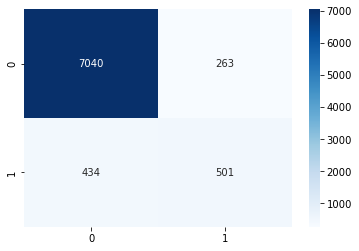

In [191]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ab  =confusion_matrix(y_test, dtc_preds)
sns.heatmap(ab, annot=True,fmt="d",cmap='Blues')

### Hyperparameter Tuning with DecisionTree for Improving Our Model

In [210]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
dt = DecisionTreeClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [211]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [212]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)

In [213]:
best_dtc_model = DecisionTreeClassifier(random_state=42, max_depth = 5, min_samples_leaf = 20)

In [214]:
best_dtc_model.fit(X_train, y_train)
dtc_preds = best_dtc_model.predict(X_test)
print("DecisionTreeClassifier : Train set Accuracy: ", metrics.accuracy_score(y_train, best_dtc_model.predict(X_train)))
print("DecisionTreeClassifier : Test set Accuracy: ", metrics.accuracy_score(y_test, dtc_preds))

DecisionTreeClassifier : Train set Accuracy:  0.9168437025796662
DecisionTreeClassifier : Test set Accuracy:  0.9155134741442098


Our test accuracy has improved a bit, which is nice!

In this notebook, the target is to find answer to a question:  Has the client subscribed a term deposit? (binary: 'yes','no')

And I built four models to give answer to this question. Creating a model will help organizations to improve their marketing strategy. They can segment those customers and apply more targeted marketing campaigns! 

### THANK YOU